In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from statsmodels.api import Logit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

matplotlib.rc("font", family = "Malgun Gothic")

In [2]:
df_raw = pd.read_csv("Telemarketing_Data_cl3.csv", encoding='utf-8-sig' )
df_raw.head()

,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,...,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
0,56,5,50_group,주부,0,no,결혼,중졸,없음,없음,...,유선전화,261,1,NaN,0,no,0,2018-01-03,87,life
1,57,5,50_group,서비스종사자,1,yes,결혼,전문학교,미확인,없음,...,유선전화,149,1,NaN,0,no,0,2018-01-03,88,life
2,37,3,30_group,서비스종사자,1,yes,결혼,전문학교,없음,대출있음,...,유선전화,226,1,NaN,0,no,0,2018-01-03,89,life
3,40,4,40_group,회사원,1,yes,결혼,검정고시,없음,없음,...,유선전화,151,1,NaN,0,no,0,2018-01-03,90,life
4,56,5,50_group,서비스종사자,1,yes,결혼,전문학교,없음,없음,...,유선전화,307,1,NaN,0,no,0,2018-01-03,91,life


In [3]:
df_raw.new_age_group.unique()

array(['50_group', '30_group', '40_group', '1020_group', '60_group',
       '70_group', '80_group', '90_group'], dtype=object)

In [4]:
df_raw_20 = df_raw[df_raw["new_age_group"]=="1020_group"]
df_raw_20.head()

,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,...,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
8,24,2,1020_group,기술자,1,yes,미혼,석박사,없음,대출있음,...,유선전화,380,1,NaN,0,no,0,2018-01-04,95,life
9,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,대출있음,...,유선전화,50,1,NaN,0,no,0,2018-01-04,96,life
11,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,대출있음,...,유선전화,222,1,NaN,0,no,0,2018-01-05,98,life
12,29,2,1020_group,산업노동자,1,yes,미혼,전문학교,없음,없음,...,유선전화,137,1,NaN,0,no,0,2018-01-05,99,life
59,25,2,1020_group,기술자,1,yes,미혼,대졸학사,없음,대출있음,...,유선전화,174,1,NaN,0,no,0,2018-01-17,146,onlineShopping


In [5]:
df_raw_20 = pd.DataFrame(df_raw_20).reset_index()


In [6]:
print(len(df_raw_20))

5669


In [7]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw_20, # 데이터
                                     test_size = 0.3, #test 데이터의 비율
                                     random_state = 1234) # random state

print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (3968, 22)
test data size: (1701, 22)


In [8]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,success,카드종류
연령,1.000,0.963,-0.205,-0.001,0.005,-0.070,0.024,0.030,-0.006
age_group,0.963,1.000,-0.192,-0.001,0.005,-0.061,0.023,0.031,-0.007
economic_group,-0.205,-0.192,1.000,-0.011,0.014,-0.004,-0.084,-0.100,-0.007
통화시간,-0.001,-0.001,-0.011,1.000,-0.072,0.077,0.021,0.405,-0.007
연락시도횟수,0.005,0.005,0.014,-0.072,1.000,0.046,-0.079,-0.066,0.010
p_days,-0.070,-0.061,-0.004,0.077,0.046,1.000,-0.040,-0.035,0.010
과거통화횟수,0.024,0.023,-0.084,0.021,-0.079,-0.040,1.000,0.230,-0.000
success,0.030,0.031,-0.100,0.405,-0.066,-0.035,0.230,1.000,0.003
카드종류,-0.006,-0.007,-0.007,-0.007,0.010,0.010,-0.000,0.003,1.000


In [9]:
# 분석 대상 이벤트 = "1"
# 카드 종류 제외하고 분석
log_model = Logit.from_formula("""success ~ 연령 + C(economic_group_dummy) + C(결혼여부) + C(학력) + C(신용카드소지여부) +
                                    C(주택대출여부) + C(개인대출여부) + C(contact) + 통화시간 + 연락시도횟수 + 
                                     과거통화횟수 + C(card_category)""", df_train)

# 적합
log_result = log_model.fit(method='bfgs')
# 결과 출력
print(log_result.summary())

         Current function value: 0.329291
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 3968
Model:                          Logit   Df Residuals:                     3940
Method:                           MLE   Df Model:                           27
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.2475
Time:                        17:00:09   Log-Likelihood:                -1306.6
converged:                      False   LL-Null:                       -1736.5
Covariance Type:            nonrobust   LLR p-value:                1.016e-163
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                   

C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1735: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1788: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1735: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1788: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Li

### 예측

In [10]:
# test 데이터 예측
y_pred = log_result.predict(df_test)
# 0과 1의 값을 가진 class 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

286     0
1505    0
4483    0
3121    0
3925    0
dtype: int32

In [11]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["success"], y_pred_class)))
print("Confustion Matrix: \n{}".format(confusion_matrix(df_test["success"], y_pred_class)))

Accuracy: 0.843

Confustion Matrix: 
[[1354   55]
 [ 212   80]]


### step 5 결론 도출 - 최종 회귀식


In [12]:
print(log_result.summary())


                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 3968
Model:                          Logit   Df Residuals:                     3940
Method:                           MLE   Df Model:                           27
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.2475
Time:                        17:00:10   Log-Likelihood:                -1306.6
converged:                      False   LL-Null:                       -1736.5
Covariance Type:            nonrobust   LLR p-value:                1.016e-163
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.6709        nan        nan        nan         nan         nan
C(economic_group_dummy)[T.yes]        -0.8821        nan   

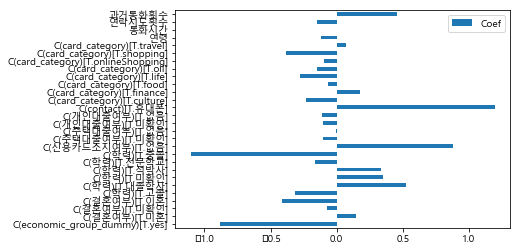

In [13]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [14]:
df_logistic_coef

,Coef
C(economic_group_dummy)[T.yes],-0.882102
C(결혼여부)[T.미혼],0.142667
C(결혼여부)[T.미확인],-0.075560
C(결혼여부)[T.이혼],-0.416436
C(학력)[T.고졸],-0.313889
C(학력)[T.대졸학사],0.526781
C(학력)[T.미확인],0.348216
C(학력)[T.석박사],0.332626
C(학력)[T.전문학교],-0.160767
C(학력)[T.중졸],-1.104696


In [15]:
df_logistic_coef.sort_values(["Coef"], ascending=True)

,Coef
C(학력)[T.중졸],-1.104696
C(economic_group_dummy)[T.yes],-0.882102
C(결혼여부)[T.이혼],-0.416436
C(card_category)[T.shopping],-0.385297
C(학력)[T.고졸],-0.313889
C(card_category)[T.life],-0.278258
C(card_category)[T.culture],-0.235537
C(학력)[T.전문학교],-0.160767
C(card_category)[T.oil],-0.150856
연락시도횟수,-0.148635


### 결론 도출 - 표준화 회귀 계수

In [16]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw_20.select_dtypes(include = "object")
df_numeric = df_raw_20.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,index,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,success,카드종류,...,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,계약여부,연락일자,card_category
0,-1.840382,-1.061704,0.11579,0.403516,0.429169,-0.574073,NaN,-0.396199,-0.440713,-1.517025,...,yes,미혼,석박사,없음,대출있음,없음,유선전화,no,2018-01-04,life
1,-1.840302,-0.641895,0.11579,0.403516,-0.819816,-0.574073,NaN,-0.396199,-0.440713,-1.492390,...,yes,미혼,전문학교,없음,대출있음,없음,유선전화,no,2018-01-04,life
2,-1.840142,-0.641895,0.11579,0.403516,-0.168830,-0.574073,NaN,-0.396199,-0.440713,-1.443121,...,yes,미혼,전문학교,없음,대출있음,없음,유선전화,no,2018-01-05,life
3,-1.840063,1.037340,0.11579,0.403516,-0.490538,-0.574073,NaN,-0.396199,-0.440713,-1.418486,...,yes,미혼,전문학교,없음,없음,대출있음,유선전화,no,2018-01-05,life
4,-1.836313,-0.641895,0.11579,0.403516,-0.350501,-0.574073,NaN,-0.396199,-0.440713,-0.260646,...,yes,미혼,대졸학사,없음,대출있음,없음,유선전화,no,2018-01-17,onlineShopping


In [17]:

# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["success"] = np.where(df_scaled["success"]>0,1,0)
df_scaled.head()

,index,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,success,카드종류,...,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,계약여부,연락일자,card_category
0,-1.840382,-1.061704,0.11579,0.403516,0.429169,-0.574073,NaN,-0.396199,0,-1.517025,...,yes,미혼,석박사,없음,대출있음,없음,유선전화,no,2018-01-04,life
1,-1.840302,-0.641895,0.11579,0.403516,-0.819816,-0.574073,NaN,-0.396199,0,-1.492390,...,yes,미혼,전문학교,없음,대출있음,없음,유선전화,no,2018-01-04,life
2,-1.840142,-0.641895,0.11579,0.403516,-0.168830,-0.574073,NaN,-0.396199,0,-1.443121,...,yes,미혼,전문학교,없음,대출있음,없음,유선전화,no,2018-01-05,life
3,-1.840063,1.037340,0.11579,0.403516,-0.490538,-0.574073,NaN,-0.396199,0,-1.418486,...,yes,미혼,전문학교,없음,없음,대출있음,유선전화,no,2018-01-05,life
4,-1.836313,-0.641895,0.11579,0.403516,-0.350501,-0.574073,NaN,-0.396199,0,-0.260646,...,yes,미혼,대졸학사,없음,대출있음,없음,유선전화,no,2018-01-17,onlineShopping


In [18]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                                                   test_size = 0.3, # test 데이터의 비율
                                                   random_state = 1234) #random state

In [19]:
# 분석 대상 이벤트 = "1"
# 카드 종류 제외하고 분석
scaled_log_model  = Logit.from_formula("""success ~ 연령 + C(economic_group_dummy) + C(결혼여부) + C(학력) + C(신용카드소지여부) +
                                    C(주택대출여부) + C(개인대출여부) + C(contact) + 통화시간 + 연락시도횟수 + 
                                     과거통화횟수 + C(card_category)""", df_scaled_train)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

         Current function value: 0.327043
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 3968
Model:                          Logit   Df Residuals:                     3940
Method:                           MLE   Df Model:                           27
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.2527
Time:                        17:00:13   Log-Likelihood:                -1297.7
converged:                      False   LL-Null:                       -1736.5
Covariance Type:            nonrobust   LLR p-value:                1.754e-167
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -3.5728      0.521     -6.861      0.000      -4.593      

C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [20]:
# test 데이터 예측
scaled_y_pred = scaled_log_result.predict(df_scaled_test)
# 0과 1의 값을 가진 class 변환
scaled_y_pred_class = (scaled_y_pred > 0.5).astype(int)
scaled_y_pred_class.head()

286     0
1505    0
4483    0
3121    0
3925    0
dtype: int32

In [21]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_scaled_test["success"], scaled_y_pred_class)))
print("Confustion Matrix: \n{}".format(confusion_matrix(df_scaled_test["success"], scaled_y_pred_class)))

Accuracy: 0.841

Confustion Matrix: 
[[1352   57]
 [ 214   78]]


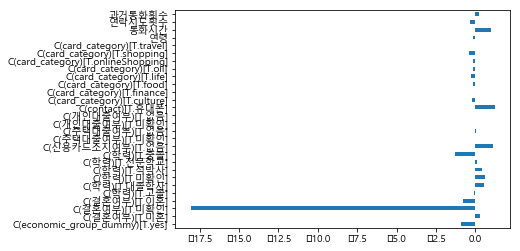

In [22]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, 
                                index = scaled_log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef", legend = False)

In [23]:
df_logistic_coef

,Coef
C(economic_group_dummy)[T.yes],-0.918920
C(결혼여부)[T.미혼],0.318272
C(결혼여부)[T.미확인],-18.071483
C(결혼여부)[T.이혼],-0.808554
C(학력)[T.고졸],-0.072501
C(학력)[T.대졸학사],0.535697
C(학력)[T.미확인],0.615252
C(학력)[T.석박사],0.409347
C(학력)[T.전문학교],0.105822
C(학력)[T.중졸],-1.264514


In [24]:
df_logistic_coef.sort_values(["Coef"], ascending=True)

,Coef
C(결혼여부)[T.미확인],-18.071483
C(학력)[T.중졸],-1.264514
C(economic_group_dummy)[T.yes],-0.918920
C(결혼여부)[T.이혼],-0.808554
C(card_category)[T.shopping],-0.416289
연락시도횟수,-0.329309
C(card_category)[T.life],-0.255128
C(card_category)[T.culture],-0.211497
C(card_category)[T.oil],-0.147108
연령,-0.129133


# 그렇다면 결혼여부 여부를 제외하고 돌려본다.

In [25]:
# 분석 대상 이벤트 = "1"
# 카드 종류 제외하고 분석
scaled_log_model  = Logit.from_formula("""success ~ 연령 + C(economic_group_dummy) +  C(학력) + C(신용카드소지여부) +
                                    C(주택대출여부) + C(개인대출여부) + C(contact) + 통화시간 + 연락시도횟수 + 
                                     과거통화횟수 + C(card_category)""", df_scaled_train)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.328723
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 3968
Model:                          Logit   Df Residuals:                     3943
Method:                           MLE   Df Model:                           24
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.2488
Time:                        17:00:15   Log-Likelihood:                -1304.4
converged:                       True   LL-Null:                       -1736.5
Covariance Type:            nonrobust   LLR p-value:                5.417e-167
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -3.3414        nan    

C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [26]:
# test 데이터 예측
scaled_y_pred = scaled_log_result.predict(df_scaled_test)
# 0과 1의 값을 가진 class 변환
scaled_y_pred_class = (scaled_y_pred > 0.5).astype(int)
scaled_y_pred_class.head()

# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_scaled_test["success"], scaled_y_pred_class)))
print("Confustion Matrix: \n{}".format(confusion_matrix(df_scaled_test["success"], scaled_y_pred_class)))

Accuracy: 0.842

Confustion Matrix: 
[[1355   54]
 [ 214   78]]


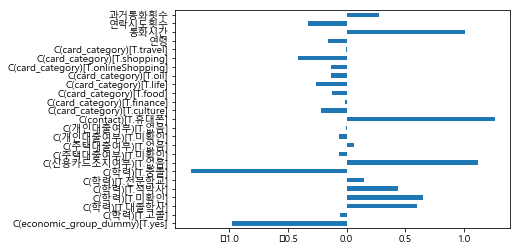

In [32]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, 
                                index = scaled_log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef", legend = False)

In [28]:
df_logistic_coef.sort_values(["Coef"], ascending=True)

,Coef
C(학력)[T.중졸],-1.326495
C(economic_group_dummy)[T.yes],-0.970753
C(card_category)[T.shopping],-0.409616
연락시도횟수,-0.325025
C(card_category)[T.life],-0.261768
C(card_category)[T.culture],-0.216568
연령,-0.156839
C(card_category)[T.onlineShopping],-0.135738
C(card_category)[T.oil],-0.135212
C(card_category)[T.food],-0.123948
